In [1]:
import dask.dataframe as dd
import dl_isd_lite as dl
import joblib
from joblib import Parallel, delayed
import glob
import pandas as pd
from tqdm import tqdm
import xarray as xr
import numpy as np

import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

# Summary

This notebook goes through a common workflow, where one extracts variables from a gridded data set at various points of interest to then run a regression for those points, or pass those variables to some other model. Here we'll try to downscale the GEFS (Global Ensemble Forecast System) using multiple linear regression. I've done this in the past with the previous low-resolution version of the GEFS using a neural network and found promising results. Because the GEFS is higher resolution I wanted to see if I could do the same, but the multiple linear regression model included here performs poorly for the high-resolution model. Nonetheless, the regression at the end demonstrates the workflow works.

## Datasets

Any section run before "Randomly select a station..." requires the following data:

Station data: [Integrated Surface Database](https://www.ncdc.noaa.gov/isd)
<br>
GEFS output: [control member of the GEFS reforecast](https://noaa-gefs-retrospective.s3.amazonaws.com/index.html#GEFSv12/reforecast/)

I have the necessary subset of the data available for download from Google Drive [here](https://drive.google.com/drive/folders/10DA80hh7DrK_qssJPvU90qHp56GxkHVI?usp=sharing). Update the respective paths in cell #3 to the path you have GEFS/ISD saved in.



In [2]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=4)
client = Client(cluster)

In [3]:
year = 2019

isd_outpath = '/mnt/chromeos/removable/meteori/isd/'
gefs_path = '/mnt/chromeos/removable/meteori/noaa-gefs-retrospective/'

In [4]:
# load the gridded dataset
ds = xr.open_mfdataset(f'{gefs_path}*.nc')
ds

<xarray.Dataset>
Dimensions:            (latitude: 721, longitude: 1440, valid_time: 241)
Coordinates:
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * valid_time         (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 20...
Data variables:
    t2m                (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    cape               (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    msl                (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    r                  (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    shtfl              (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    tcc                (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    gflux              (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    number             (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    time               (valid_time) datetime64[ns] 2019-01-01 ... 2019-08-29
    heightAboveGround  (valid_time) int32 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    surface            (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    meanSea            (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    hybrid             (valid_time) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    atmosphere         (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0

# Visualize GEFS Data

The subset of the GEFS dataset I've downloaded goes from January 1, 2019 to August 29,2019. Here I show air temperature from the first 10 days in January 2019 of 3 hour forecasts (00:00 UTC initialization time) from the NCEP's GEFS (Global Ensemble Forecast System). 

In [5]:
ds.valid_time[0:10]

<xarray.DataArray 'valid_time' (valid_time: 10)>
array(['2019-01-01T03:00:00.000000000', '2019-01-02T03:00:00.000000000',
       '2019-01-03T03:00:00.000000000', '2019-01-04T03:00:00.000000000',
       '2019-01-05T03:00:00.000000000', '2019-01-06T03:00:00.000000000',
       '2019-01-07T03:00:00.000000000', '2019-01-08T03:00:00.000000000',
       '2019-01-09T03:00:00.000000000', '2019-01-10T03:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 2019-01-1...
Attributes:
    standard_name:  time
    long_name:      time

In [6]:
hv_ds = hv.Dataset(ds['t2m'])[:, :, ds.valid_time[0:10]]
hv_ds

:Dataset   [longitude,latitude,valid_time]   (t2m)

:HoloMap   [valid_time]
   :Image   [longitude,latitude]   (t2m)
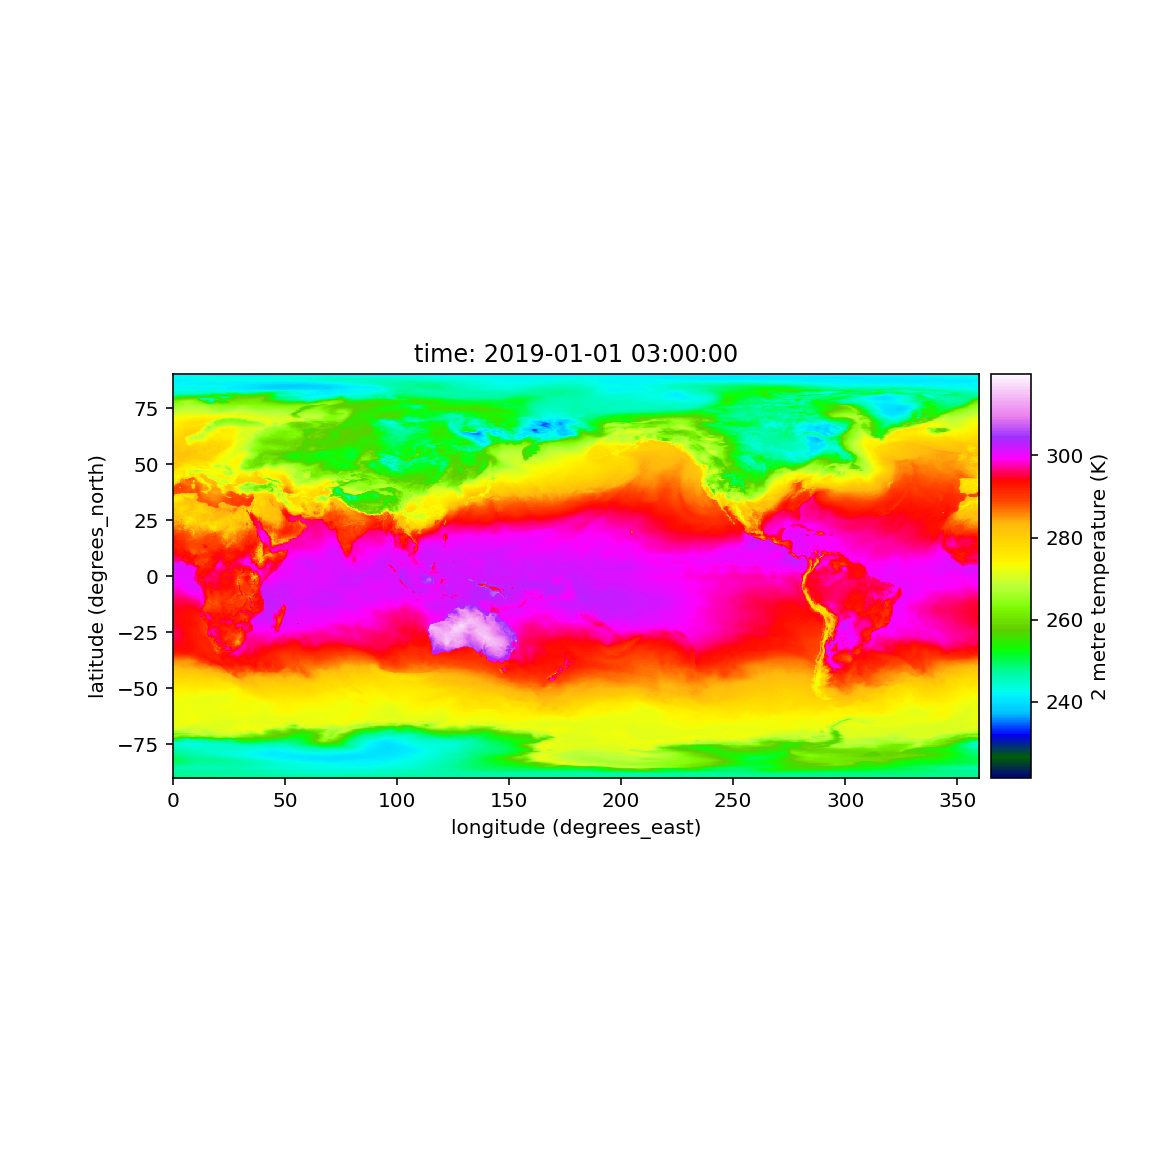
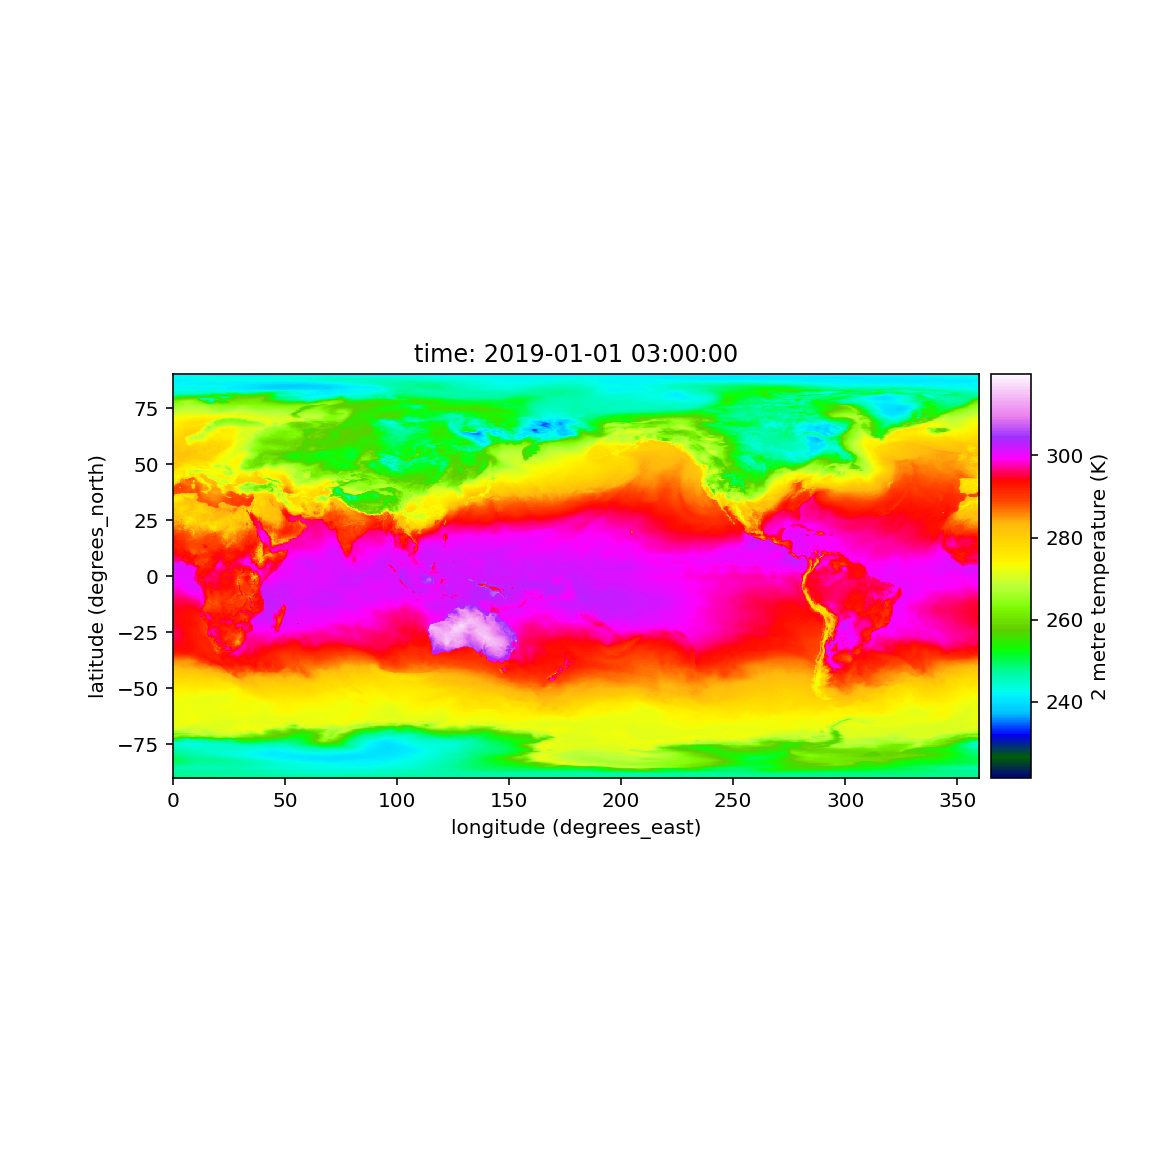
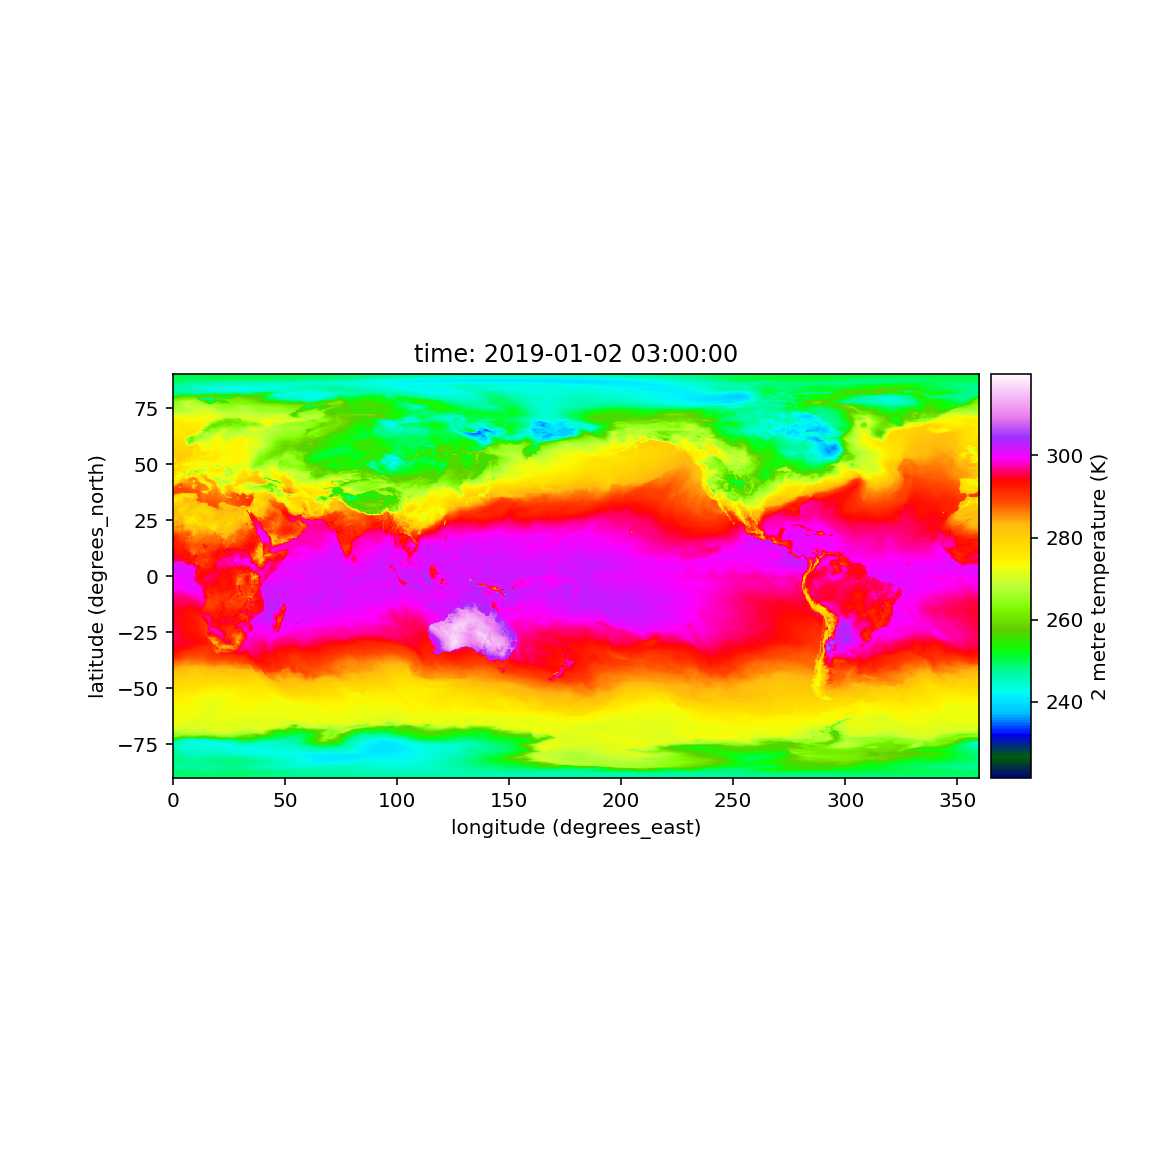
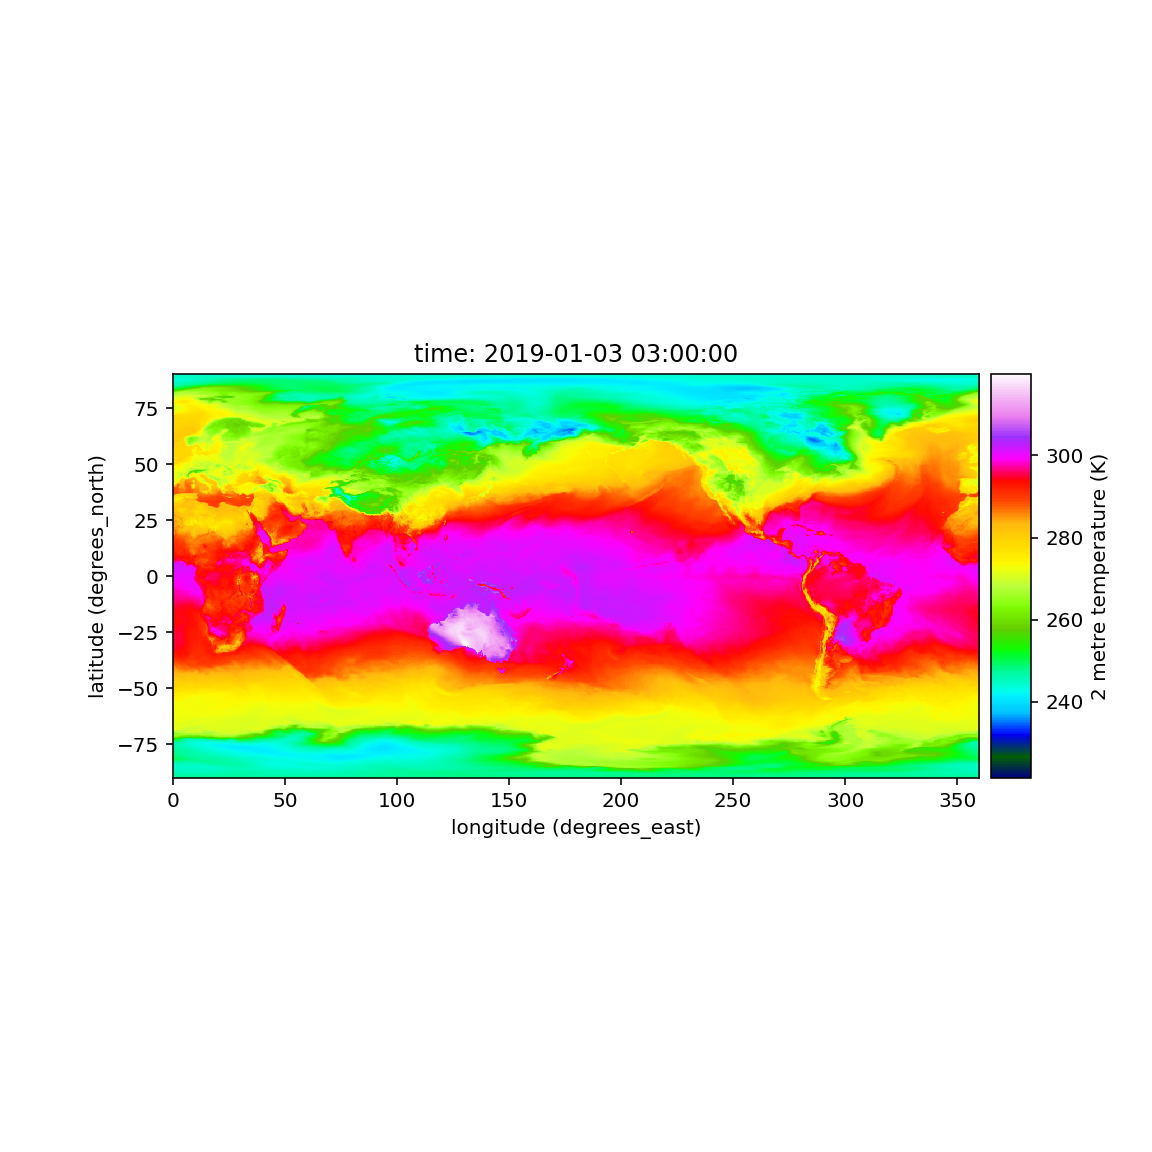
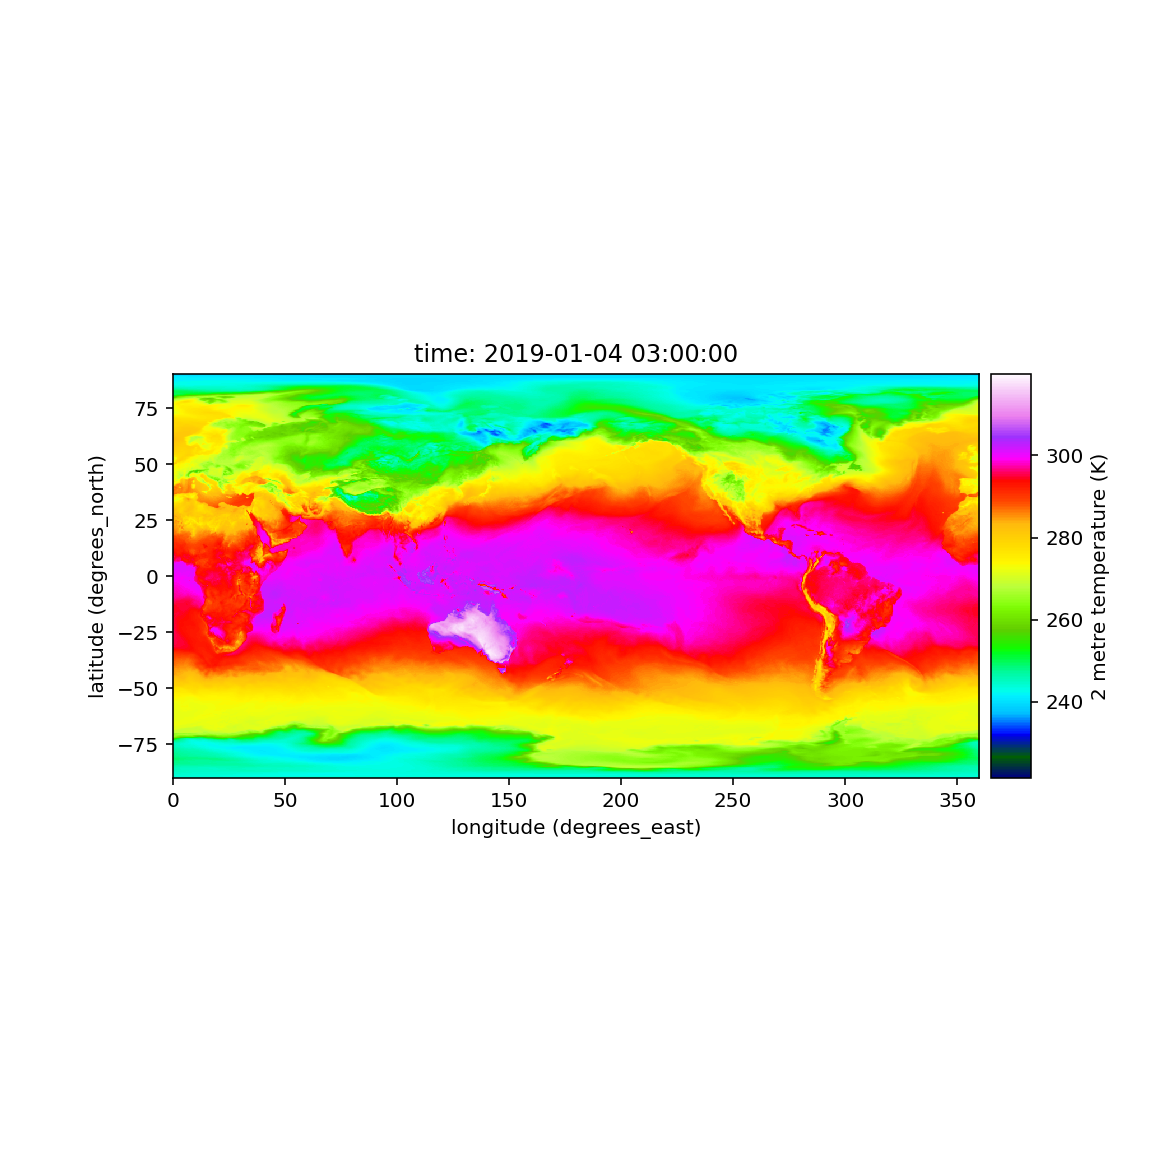
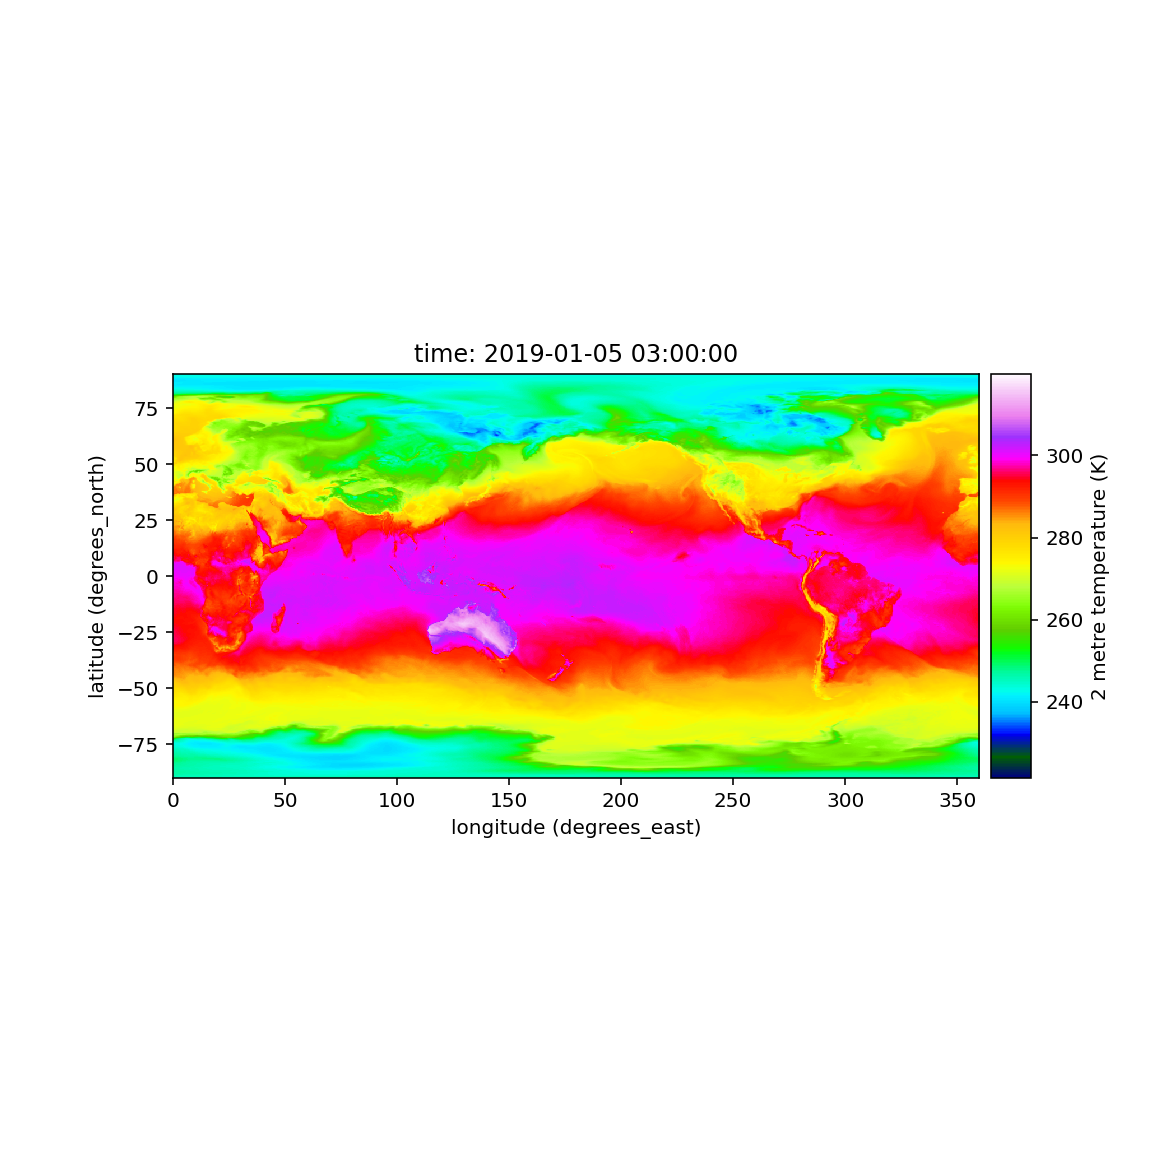
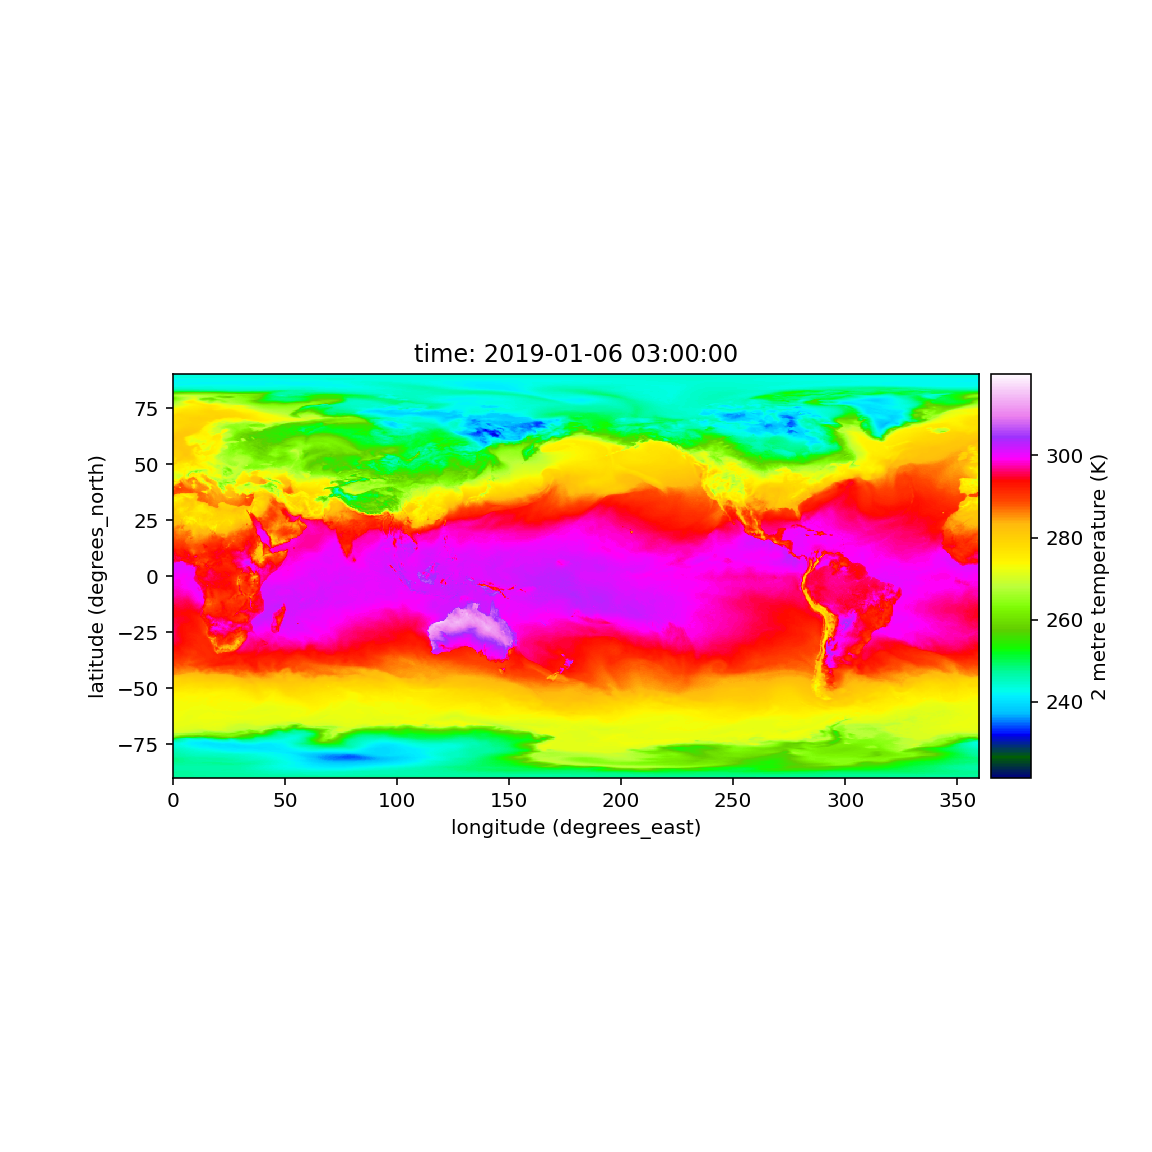
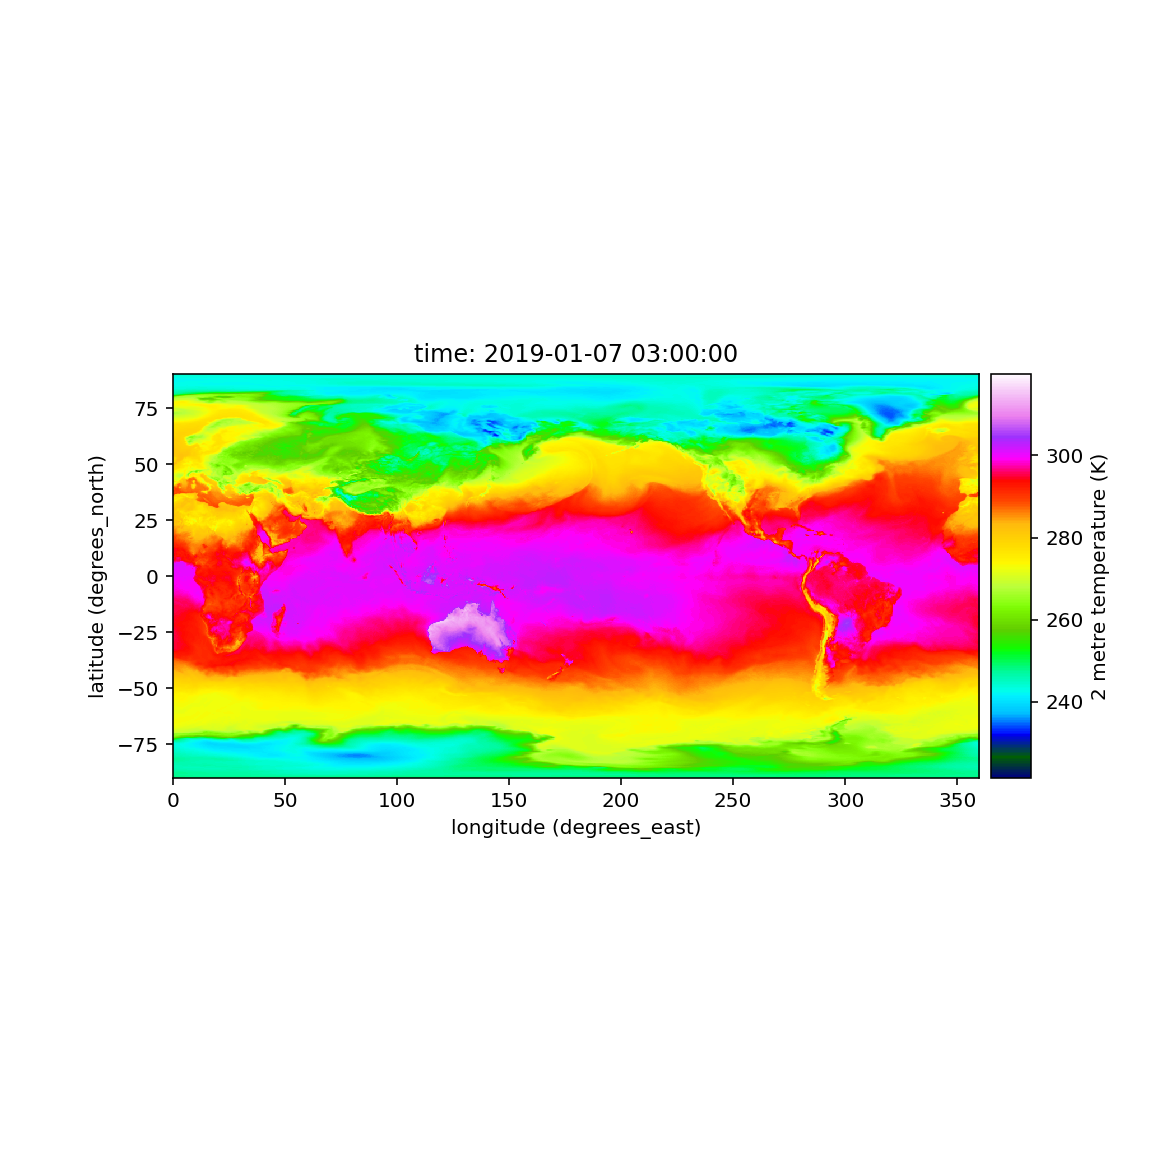
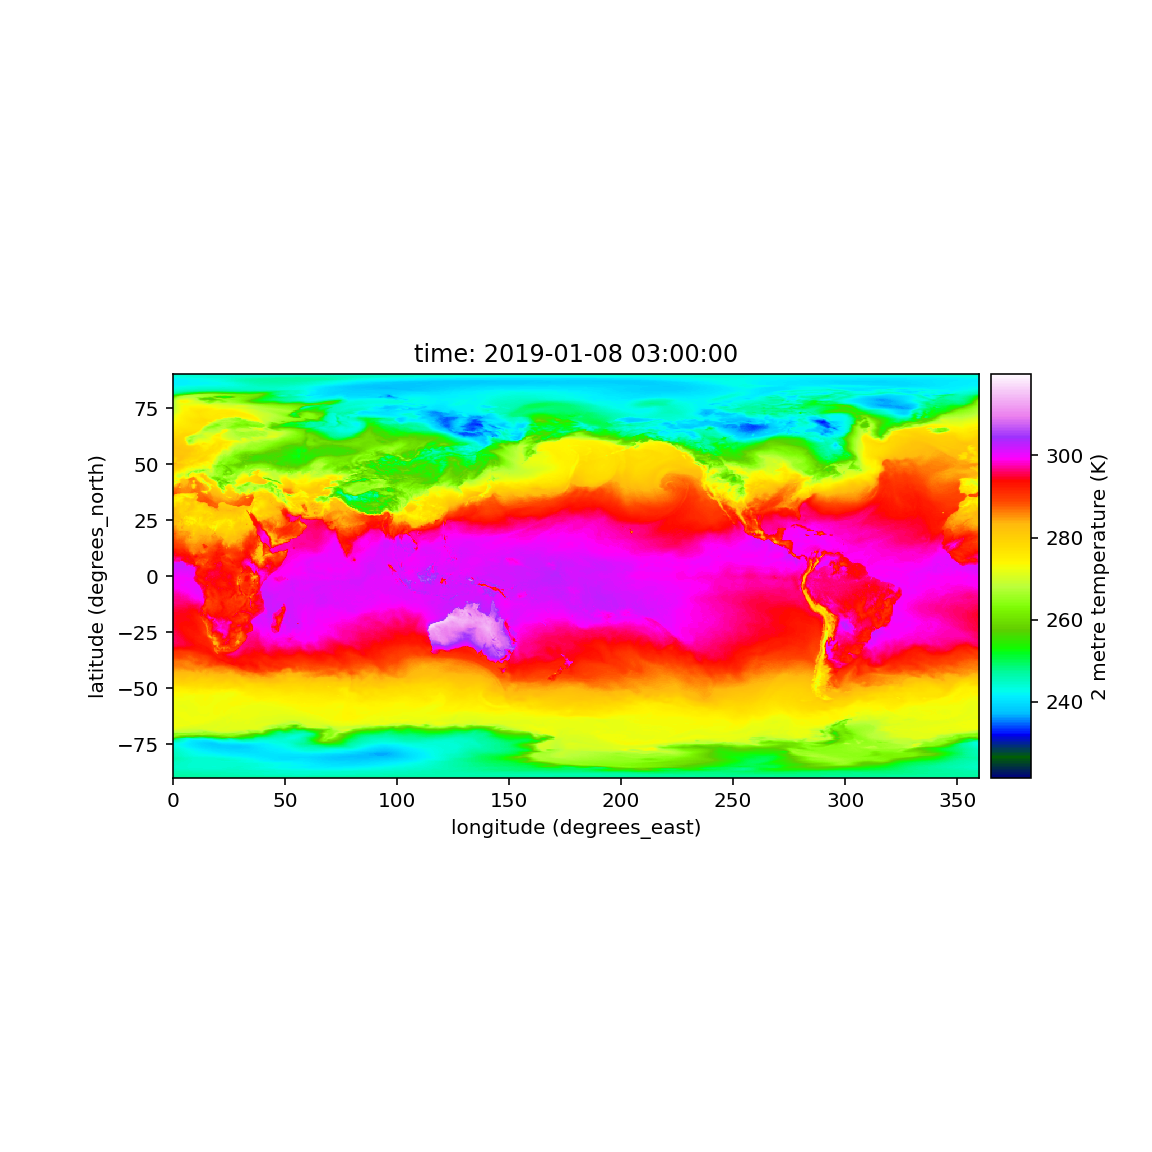
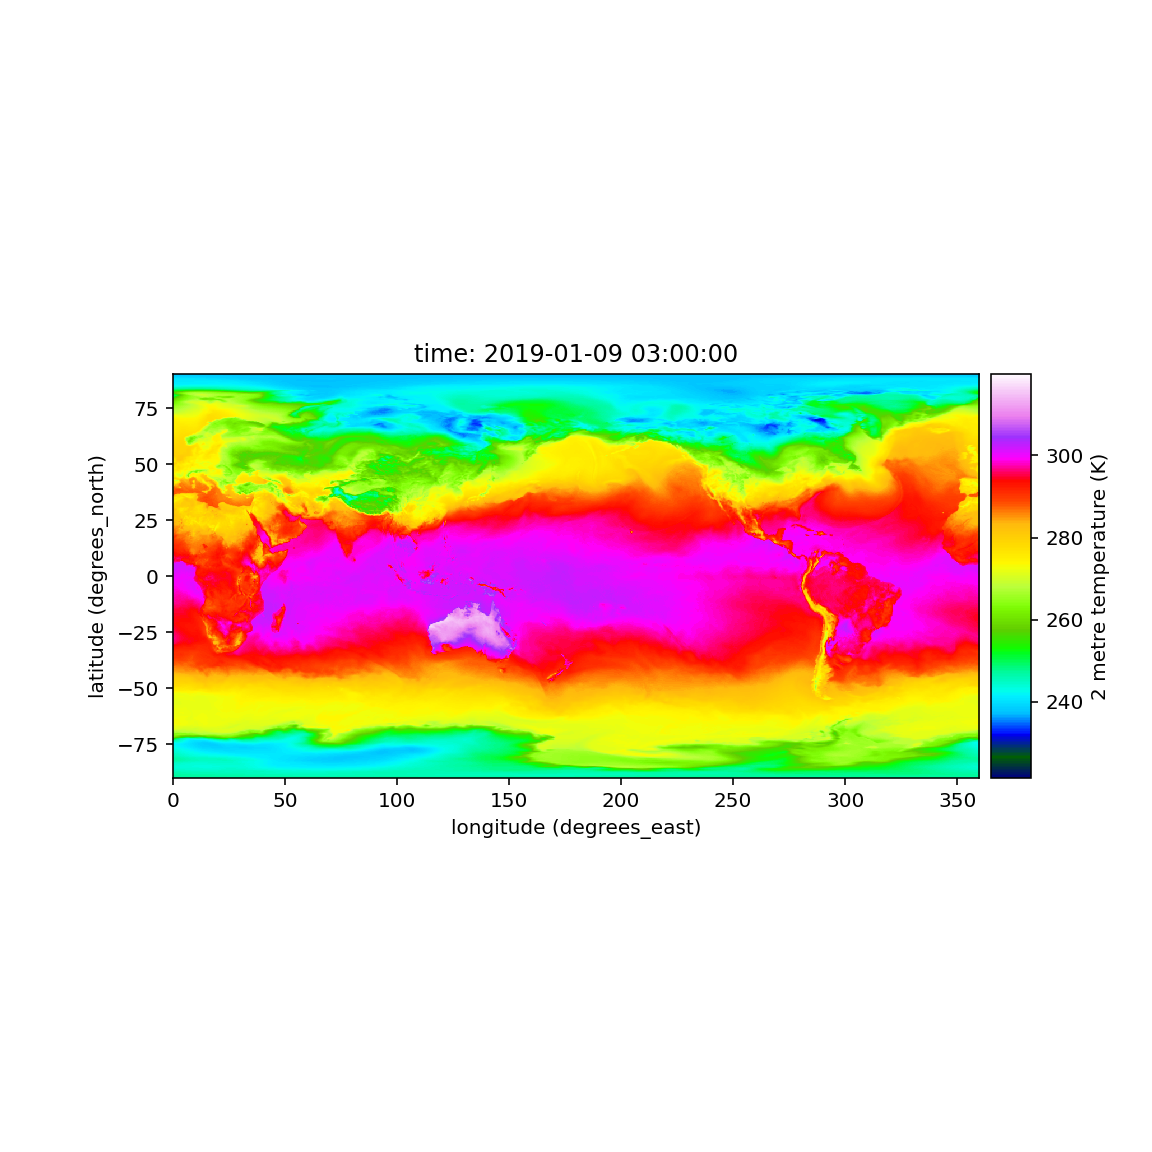
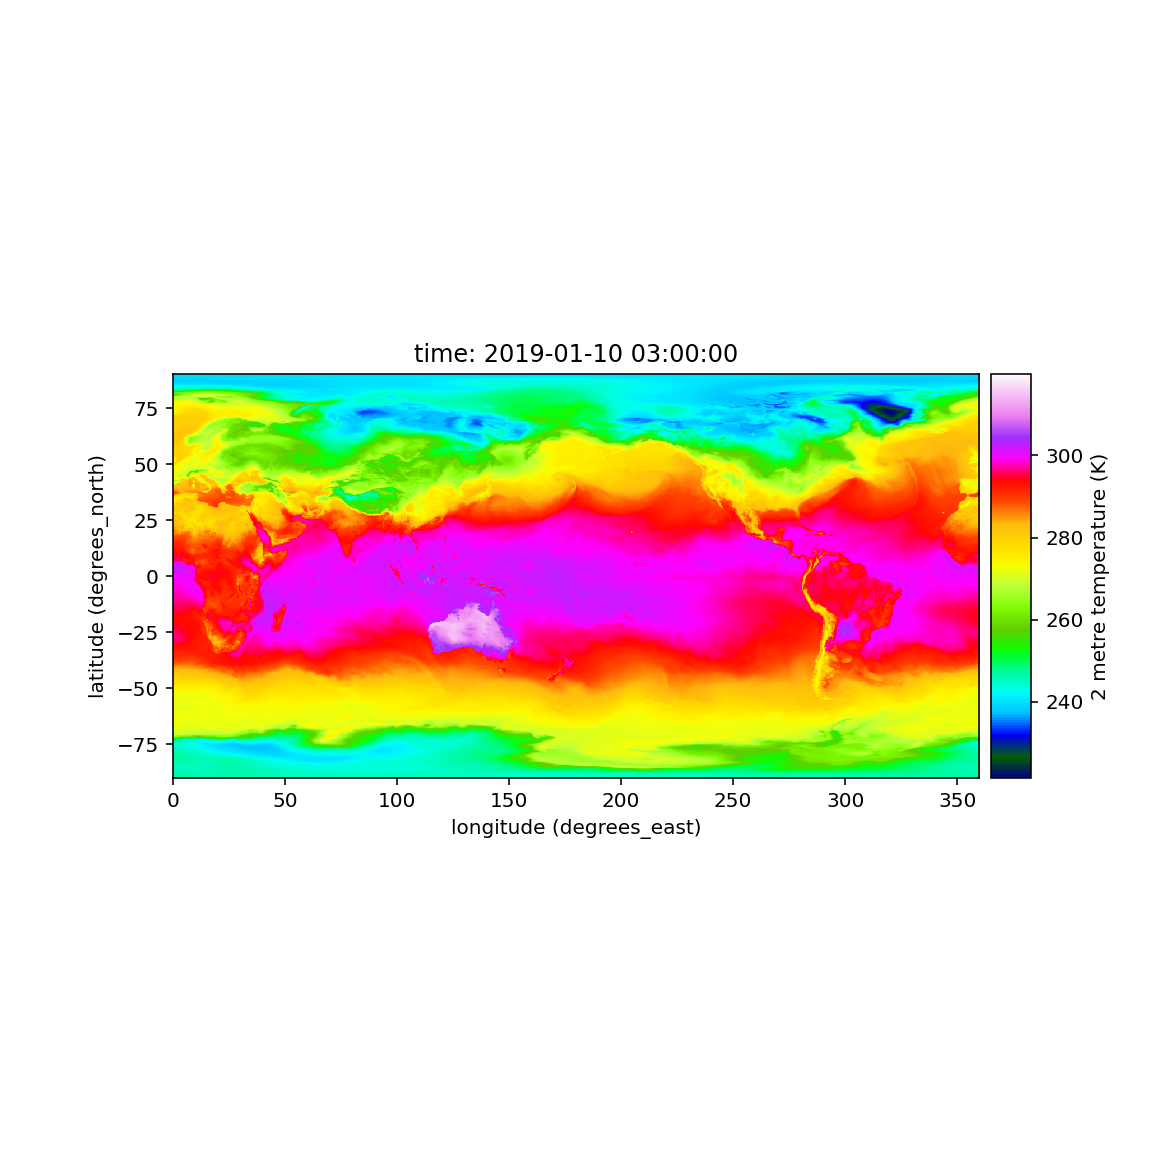

In [7]:
airtemp = hv_ds.to(hv.Image, kdims=["longitude", "latitude"], dynamic=False)
airtemp[:, :, :].opts(cmap='gist_ncar', colorbar=True, fig_size=200)

# Select Stations in the US

There are still 2000+ stations we'll use in the training set for the regression

In [9]:
downloaded_stations = glob.glob(f'{isd_outpath}*.csv')
downloaded_stations = [fpath[len(isd_outpath):-9] for fpath in downloaded_stations]

In [10]:
df_station = pd.read_csv('https://www.ncei.noaa.gov/pub/data/noaa/isd-history.csv',na_values=['-999'])
# check to see if this station has been downloaded
df_station['station'] = df_station['USAF'].astype(str) + '-' + df_station['WBAN'].astype(str)
df_station = df_station[df_station['station'].isin(downloaded_stations)]
# select stations in the US and that don't have suspicious lat/lon (lat/lon=0)
condition = ((df_station['LAT'] != 0) & (df_station['LON'] != 0) & (df_station['CTRY']=='US'))
# select stations with complete info
df_station = df_station[condition].dropna(subset=['LAT','LON','ELEV(M)','STATE'])
df_station.head()

USAF   WBAN                         STATION NAME CTRY STATE  ICAO  \
14482  690150  93121                    TWENTY NINE PALMS   US    CA  KNXP   
15090  700001  26492                      PORTAGE GLACIER   US    AK  PATO   
15092  700197  26558                              SELAWIK   US    AK  PASK   
15094  700260  27502  W POST-WILL ROGERS MEMORIAL AIRPORT   US    AK  PABR   
15098  700300  27503                   WAINWRIGHT AIRPORT   US    AK  PAWI   

          LAT      LON  ELEV(M)     BEGIN       END       station  
14482  34.300 -116.167    625.1  19900102  20210228  690150-93121  
15090  60.785 -148.839     31.4  20060101  20210228  700001-26492  
15092  66.600 -159.986      7.6  20060101  20210301  700197-26558  
15094  71.283 -156.782      9.5  19450101  20210301  700260-27502  
15098  70.639 -159.995      9.1  19991102  20210127  700300-27503

# Convert Units

In [11]:
ds['longitude'] = m180_to_180(ds['longitude'])
ds['t2m'] = ds['t2m'] - 273.15

# Interpolate

Find the nearest grid cell to the station and interpolate using xarray's advanced interpolation

In [12]:
coords = {'station': df_station['station'].values}
dims = 'station'

lon_points = xr.DataArray(df_station['LON'].values, dims=dims, coords=coords)
lat_points = xr.DataArray(df_station['LAT'].values, dims=dims, coords=coords)

ds = ds.interp(longitude=lon_points, latitude=lat_points,method='nearest')

/home/smr1020/miniconda3/envs/meteori/lib/python3.9/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]
/home/smr1020/miniconda3/envs/meteori/lib/python3.9/site-packages/xarray/core/indexing.py:1375: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[in

In [13]:
ds.to_zarr('gefs_interp')

In [14]:
ds = xr.open_zarr('gefs_interp')
ds.load()

<xarray.Dataset>
Dimensions:            (station: 2043, valid_time: 241)
Coordinates:
    latitude           (station) float64 34.3 60.78 66.6 ... 30.51 36.38 52.22
    longitude          (station) float64 -116.2 -148.8 -160.0 ... -88.98 -174.2
  * station            (station) object '690150-93121' ... 'A00032-25715'
  * valid_time         (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 20...
Data variables:
    atmosphere         (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    cape               (valid_time, station) float32 0.0 1.0 0.0 ... 0.0 1.0
    gflux              (valid_time, station) float32 92.43 7.327 ... 19.31 nan
    heightAboveGround  (valid_time) int32 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2
    hybrid             (valid_time) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    meanSea            (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    msl                (valid_time, station) float32 1.016e+05 ... 1.008e+05
    number             (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    r                  (valid_time, station) float32 23.45 97.22 ... 54.65 95.05
    shtfl              (valid_time, station) float32 -18.7 -17.7 ... -4.896
    surface            (valid_time) int32 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    t2m                (valid_time, station) float32 3.984 -1.686 ... 10.94
    tcc                (valid_time, station) float32 0.0 86.3 96.1 ... 0.0 84.2
    time               (valid_time) datetime64[ns] 2019-01-01 ... 2019-08-29

# Calculate Bias at Each Station

In [15]:
def read_station_csv(isd_outpath,year,station_name):
    """read in the data for a given station in the ISD (Lite) dataset"""
    
    df = pd.read_csv(f'{isd_outpath}{station_name}-{year}.csv',sep='\s+',na_values='-9999',parse_dates=[['year','month','day','hour']],
                 names=['station','year','month','day','hour','t2m','dpt','mslp','wdir','wspd','sky','prec1','prec6'])
    
    scale_10_vars = ['t2m','dpt','mslp','wspd','prec1','prec6'] # some variables have a scale factor
    df[scale_10_vars] = df[scale_10_vars]/10
    
    return df

def calculate_bias_at_station(model,obs_time_dim='year_month_day_hour',ovar='t2m'):
    """matches the station data with the once daily forecast data"""
    
    station_name = model.station.values
    obs = read_station_csv(isd_outpath,year,station_name)
    
    # if there are obs...
    if len(obs) != 0:
    
        coords = {'valid_time':obs[obs_time_dim],
                  'station':[station_name]
                 }
        obs = xr.DataArray(obs[ovar].values[:,np.newaxis],dims=['valid_time','station'],coords=coords)

        return (model[ovar] - obs).load()
    
    # if there are no obs, pass a dummy variable
    if len(obs) == 0:
        
        fill = np.nan*np.ones(model[ovar].shape)
        return xr.DataArray(fill,dims=model.dims,coords=model.coords).load()
    
def bias_calc(station,ds=ds):
    """function wrapper to make things cleaner in the cell below"""
    return  calculate_bias_at_station(ds.sel(station=station),ovar='t2m')

In [16]:
with joblib.parallel_backend('dask'):
    bias = Parallel(n_jobs=20, verbose=5)(delayed(bias_calc)(station) for station in ds.station)

[Parallel(n_jobs=20)]: Using backend DaskDistributedBackend with 10 concurrent workers.
[Parallel(n_jobs=20)]: Done  52 tasks      | elapsed:   18.6s
[Parallel(n_jobs=20)]: Done 142 tasks      | elapsed:   34.7s
[Parallel(n_jobs=20)]: Done 268 tasks      | elapsed:   53.9s
[Parallel(n_jobs=20)]: Done 430 tasks      | elapsed:  1.3min
[Parallel(n_jobs=20)]: Done 628 tasks      | elapsed:  1.8min
[Parallel(n_jobs=20)]: Done 862 tasks      | elapsed:  2.3min
[Parallel(n_jobs=20)]: Done 1132 tasks      | elapsed:  2.9min
[Parallel(n_jobs=20)]: Done 1438 tasks      | elapsed:  3.6min
[Parallel(n_jobs=20)]: Done 1780 tasks      | elapsed:  4.4min
[Parallel(n_jobs=20)]: Done 2043 out of 2043 | elapsed:  5.1min finished


In [17]:
ds['t2m_bias'] = xr.concat(bias,dim='station')

# Cleanup and write to disk
I'm saving this last file as a netCDF file because it is a small and more people are familiar with the format. The final netCDF is easily converted to a pandas dataframe which is helpful when you then want to pass it to another model

In [44]:
# remove variables that don't have station in their dimensions. These variable aren't useful
drop_list = []
for dvar in ds.data_vars:
    if 'station' not in ds.data_vars[dvar].dims:
        drop_list += [dvar]
        
ds = ds.drop(drop_list)
ds

<xarray.Dataset>
Dimensions:     (station: 2043, valid_time: 241)
Coordinates:
  * station     (station) object '690150-93121' ... 'A00032-25715'
    latitude    (station) float64 34.3 60.78 66.6 71.28 ... 30.51 36.38 52.22
    longitude   (station) float64 -116.2 -148.8 -160.0 ... -86.96 -88.98 -174.2
  * valid_time  (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 2019-08-2...
Data variables:
    cape        (valid_time, station) float32 0.0 1.0 0.0 0.0 ... 804.0 0.0 1.0
    gflux       (valid_time, station) float32 92.43 7.327 -23.77 ... 19.31 nan
    msl         (valid_time, station) float32 1.016e+05 1.001e+05 ... 1.008e+05
    r           (valid_time, station) float32 23.45 97.22 91.31 ... 54.65 95.05
    shtfl       (valid_time, station) float32 -18.7 -17.7 -24.3 ... -62.9 -4.896
    t2m         (valid_time, station) float32 3.984 -1.686 ... 18.04 10.94
    tcc         (valid_time, station) float32 0.0 86.3 96.1 ... 0.0 0.0 84.2
    t2m_bias    (valid_time, station) float64 -0.4157 -4.486 ... 1.044 -0.1564

In [43]:
ds.to_netcdf('gefs_interp.nc')

# Randomly select a station to visualize the forecast temperature and bias

In [9]:
ds = xr.open_dataset('gefs_interp.nc')
ds.load()
ds

<xarray.Dataset>
Dimensions:     (station: 2043, valid_time: 241)
Coordinates:
  * station     (station) object '690150-93121' ... 'A00032-25715'
    latitude    (station) float64 34.3 60.78 66.6 71.28 ... 30.51 36.38 52.22
    longitude   (station) float64 -116.2 -148.8 -160.0 ... -86.96 -88.98 -174.2
  * valid_time  (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 2019-08-2...
Data variables:
    cape        (valid_time, station) float32 0.0 1.0 0.0 0.0 ... 804.0 0.0 1.0
    gflux       (valid_time, station) float32 92.43 7.327 -23.77 ... 19.31 nan
    msl         (valid_time, station) float32 1.016e+05 1.001e+05 ... 1.008e+05
    r           (valid_time, station) float32 23.45 97.22 91.31 ... 54.65 95.05
    shtfl       (valid_time, station) float32 -18.7 -17.7 -24.3 ... -62.9 -4.896
    t2m         (valid_time, station) float32 3.984 -1.686 ... 18.04 10.94
    tcc         (valid_time, station) float32 0.0 86.3 96.1 ... 0.0 0.0 84.2
    t2m_bias    (valid_time, station) float64 -0.4157 -4.486 ... 1.044 -0.1564

In [45]:
t2m = ds.t2m
t2m_bias = ds.t2m_bias
t2m.load()
t2m_bias.load()

<xarray.DataArray 't2m_bias' (valid_time: 241, station: 2043)>
array([[-0.41574707, -4.48572998, -3.62572632, ...,         nan,
        -1.16574097,         nan],
       [-2.01621094, -4.51621704,  0.60379028, ...,         nan,
        -0.70623779,         nan],
       [-0.59311523, -7.3531189 ,  0.02688293, ...,         nan,
        -1.09310913,  2.78688965],
       ...,
       [-2.04998169, -4.55      , -3.7499939 , ...,  2.95      ,
        -2.1499939 , -1.55      ],
       [-1.81414185, -1.58416138, -3.49414673, ...,  2.23584595,
        -0.75415039, -0.93415527],
       [-2.95644531, -3.45644531, -2.55644531, ...,  1.54355469,
         1.04354858, -0.156427  ]])
Coordinates:
  * station     (station) object '690150-93121' ... 'A00032-25715'
    latitude    (station) float64 34.3 60.78 66.6 71.28 ... 30.51 36.38 52.22
    longitude   (station) float64 -116.2 -148.8 -160.0 ... -86.96 -88.98 -174.2
  * valid_time  (valid_time) datetime64[ns] 2019-01-01T03:00:00 ... 2019-08-2...

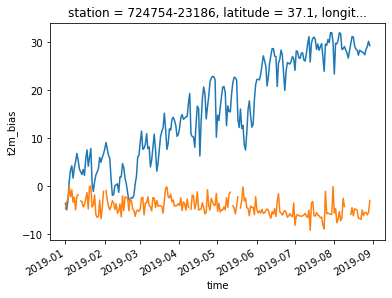

In [49]:
i = np.random.randint(0,len(t2m.station)-1)
t2m.isel(station=i).plot()
t2m_bias.isel(station=i).plot()

# Regression

Here I use multiple linear regression (MLR) and attempt to downscale the GEFS. This version of the GEFS is at 0.5x0.5 degree resolution, so I would not expect for statistical methods to be useful for downscaling. As expected, this MLR performs poorly. Possible improvements include adding an elevation bias term (diffence between station and grid cell height), but given the low amount of signal it's probably not worth investing more time.

In [3]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
ds = xr.open_dataset('./gefs_interp.nc')

using a small subset of variables, predict temperature bias

In [61]:
features = ['cape', 'gflux', 'msl', 'r', 'shtfl', 'tcc'] # predictors (see variable attributes in dataset for full names)
target = 't2m_bias' # target

all_vars = [target] + features

df = ds.to_dataframe()
df = df.reset_index()
df = df.dropna(subset=all_vars) # remove nans

In [62]:
train = df[df.valid_time < pd.to_datetime('2019-07-01')]
test = df[df.valid_time > pd.to_datetime('2019-07-01')]

train = train.sample(frac=1)

In [63]:
X_train = train[features]
y_train = train[pred]
X_test = test[features]
y_test = test[pred]

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [64]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_minmax, y_train)

LinearRegression()

In [65]:
X_test_minmax = min_max_scaler.fit_transform(X_test)


y_pred = regr.predict(X_test_minmax)

With a coefficient of determination of 0.07 (explaining 7% of the variance), this model is not useful

In [66]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 2.0192323   7.5227165   0.66984093 -0.42664027  0.01768142  0.26903915]
Mean squared error: 5.35
Coefficient of determination: 0.07
